## Pandas 개요
- pandas는 for문을 사용하지 않고 데이터를 처리한다거나 배열 기반의 함수를 제
공하는 등 NumPy의 배열 기반 계산 스타일을 많이 차용
- pandas가 NumPy 스타일을 많이 차용했지만 가장 큰 차이점은 pandas는 표 형
식의 데이터나 다양한 형태의 데이터를 다루는 데 초점을 맞춰 설계
- 그에 비해 NumPy는 단일 산술 배열 데이터를 다루는 데 특화
- 고수준의 자료구조를 제공하고 파이썬 생태계 내의 다른 분석 라이브러리 등과 함께 사용

## 1. Pandas 자료구조

In [ ]:
import pandas as pd
import numpy as np

### 1.1 Series
- 1차원 데이터

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
obj.values

array([ 4,  7, -5,  3])

In [ ]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
type(obj)

pandas.core.series.Series

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.values

array([ 4,  7, -5,  3])

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [ ]:
obj2['d'] # 라벨 이름으로 색인

4

In [ ]:
obj2[0] # 정수로 색인

4

In [ ]:
obj2[['d', 'b', 'c']] # 팬시 색인 (라벨로~)

d    4
b    7
c    3
dtype: int64

In [ ]:
obj2[[0, 1, 3]] # 팬시 색인 (정수로~)

d    4
b    7
c    3
dtype: int64

In [ ]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [ ]:
obj2[obj2 > 0] # 불리안 색인

d    4
b    7
c    3
dtype: int64

In [ ]:
obj2 * 2 # 브로드캐스팅

d     8
b    14
a   -10
c     6
dtype: int64

In [ ]:
np.exp(obj2) # 유니버설 함수

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [ ]:
sdata = {'Ohio':3500, 'Texas':71000, 'Oregon':16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio       3500
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio           3500.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
pd.isnull(obj4) # obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
pd.isnull(obj4).sum() # null인 항목의 합

1

In [ ]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [ ]:
obj4

California        NaN
Ohio           3500.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
obj4.name = 'population'
obj4

California        NaN
Ohio           3500.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [ ]:
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio           3500.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [ ]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
obj.index = ["Bob", "Steve", "Jeff", "Ryan"]
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### Workshop

- 딕셔너리 -> 시리즈 변환 (index, values 출력)

In [ ]:
dict_data = {'a':1, 'b':2, 'c':3}
sr = pd.Series(dict_data)
sr

a    1
b    2
c    3
dtype: int64

In [ ]:
sr.index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
sr.values

array([1, 2, 3])

- 리스트 -> 시리즈 변환 (index, values 출력)

In [ ]:
list_data = ['2019-01-02', 3.14, 'ABC', 100, True]
sr = pd.Series(list_data)
sr

0    2019-01-02
1          3.14
2           ABC
3           100
4          True
dtype: object

In [ ]:
sr.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
sr.values

array(['2019-01-02', 3.14, 'ABC', 100, True], dtype=object)

- 튜플 -> 시리즈 변환 (index, values 출력)

In [ ]:
tuple_data = ('영인', '2010-05-01', '여', True)

In [ ]:
sr = pd.Series(tuple_data)
sr

0            영인
1    2010-05-01
2             여
3          True
dtype: object

In [ ]:
sr.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
sr.values

array(['영인', '2010-05-01', '여', True], dtype=object)

- 튜플 -> 시리즈 변환 (index 설정)

In [ ]:
tuple_data = ('영인', '2010-05-01', '여', True)
index_name = ['이름', '생년월일', '성별', '학생여부']

sr = pd.Series(tuple_data, index=index_name)
sr

이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object

In [ ]:
sr.index

Index(['이름', '생년월일', '성별', '학생여부'], dtype='object')

In [ ]:
# 색인을 통해 '영인'값이 나오도록

In [ ]:
sr[0] # 정수 색인

'영인'

In [ ]:
sr['이름']

'영인'

- 시리즈 원소 선택

In [ ]:
# 슬라이스 색인을 통해 '2010-05-01', '여' 값이 나오도록

In [ ]:
sr[1:3]

생년월일    2010-05-01
성별               여
dtype: object

In [ ]:
sr['생년월일':'성별']

생년월일    2010-05-01
성별               여
dtype: object

### 1.2 DataFrame
- 2차원 데이터

In [ ]:
data = {'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year':[2000, 2001, 2002, 2001, 2002, 2003], 
        'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

In [ ]:
frame.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [ ]:
frame.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

In [ ]:
type(frame)

pandas.core.frame.DataFrame

In [ ]:
frame.head() # 전체 데이터 중 앞에서부터 5행만 보여줌

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9

In [ ]:
frame.tail(3) # 전체 데이터 중 뒤에서부터 3행만 보여줌

state  year  pop
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

In [ ]:
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

In [ ]:
pd.DataFrame(data, columns = ['year', 'state', 'pop'])

year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9
5  2003  Nevada  3.2

In [ ]:
pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'])

year   state  pop debt
0  2000    Ohio  1.5  NaN
1  2001    Ohio  1.7  NaN
2  2002    Ohio  3.6  NaN
3  2001  Nevada  2.4  NaN
4  2002  Nevada  2.9  NaN
5  2003  Nevada  3.2  NaN

In [ ]:
frame2 = pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'],
                      index = ['one', 'two', 'three', 'four', 'five', 'six'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [ ]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

**(1) 열 색인**

In [ ]:
frame2['state'] # 2차원 데이터인 DataFrame을 색인하면 1차원 데이터인 Series

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
type(frame2['state'])

pandas.core.series.Series

**(2) 행 색인**

In [ ]:
frame2['one'] # error!! 

KeyError: ignored

In [ ]:
frame2.loc['one'] # 1차원 Series 데이터

year     2000
state    Ohio
pop       1.5
debt      NaN
Name: one, dtype: object

In [ ]:
type(frame2.loc['one'])

pandas.core.series.Series

In [ ]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [ ]:
frame2.loc['one':'two']

year state  pop debt
one  2000  Ohio  1.5  NaN
two  2001  Ohio  1.7  NaN

In [ ]:
frame2['one':'two'] # 슬라이싱을 통해서 행을 가져올 때는 loc를 안써도 선택이 됨

year state  pop debt
one  2000  Ohio  1.5  NaN
two  2001  Ohio  1.7  NaN

In [ ]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [ ]:
frame2['debt'] = 16.5 # 브로드캐스팅
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5

In [ ]:
frame2['debt'] = np.arange(6)
frame2

year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     1
three  2002    Ohio  3.6     2
four   2001  Nevada  2.4     3
five   2002  Nevada  2.9     4
six    2003  Nevada  3.2     5

In [ ]:
sr = pd.Series([1, 2, 3, 4, 5, 6], index=['one', 'two', 'three', 'four', 'five', 'six'])

In [ ]:
frame2['debt'] = sr
frame2

year   state  pop  debt
one    2000    Ohio  1.5     1
two    2001    Ohio  1.7     2
three  2002    Ohio  3.6     3
four   2001  Nevada  2.4     4
five   2002  Nevada  2.9     5
six    2003  Nevada  3.2     6

In [ ]:
sr = pd.Series([1, 3, 5], index=['one', 'three', 'five'])
frame2['debt'] = sr
frame2

year   state  pop  debt
one    2000    Ohio  1.5   1.0
two    2001    Ohio  1.7   NaN
three  2002    Ohio  3.6   3.0
four   2001  Nevada  2.4   NaN
five   2002  Nevada  2.9   5.0
six    2003  Nevada  3.2   NaN

In [ ]:
pop = {'Nevada':{2001:2.4, 2002:2.9},
       'Ohio':{2000:1.5, 2001:1.7, 2002:3.6}}
frame3 = pd.DataFrame(pop)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [ ]:
frame3.T

2001  2002  2000
Nevada   2.4   2.9   NaN
Ohio     1.7   3.6   1.5

In [ ]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003     NaN   NaN

In [ ]:
frame3.name = 'population'
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [ ]:
frame3.index.name = 'year'
frame3.columns.name= 'state'

In [ ]:
frame3

state  Nevada  Ohio
year               
2001      2.4   1.7
2002      2.9   3.6
2000      NaN   1.5

### 1.3 Index
- 컬럼명, 인덱스 (데이터과 행과 열을 알려주는 메타 데이터) 

In [ ]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [ ]:
obj.index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
obj.index[:2]

Index(['a', 'b'], dtype='object')

In [ ]:
obj.index[1]

'b'

In [ ]:
obj.index[1] = 'd'

TypeError: ignored

In [ ]:
labels = pd.Index(np.arange(3))
pd.Series([1, 2, 3], index=labels)

0    1
1    2
2    3
dtype: int64

### Workshop

- 딕셔너리 -> 데이터프레임

In [ ]:
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

In [ ]:
df = pd.DataFrame(dict_data)
df

c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15

- 행인덱스/열이름 설정

In [ ]:
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])
df

나이 성별   학교
준서  15  남  덕영중
예은  17  여  수리중

In [ ]:
# 준서, 예은 -> 학생1, 학생2

In [ ]:
df.index = ['학생1', '학생2']
df

나이 성별   학교
학생1  15  남  덕영중
학생2  17  여  수리중

In [ ]:
# 나이, 성별, 학교 -> 연령, 남녀, 소속

In [ ]:
df.columns = ['연령', '남녀', '소속']
df

연령 남녀   소속
학생1  15  남  덕영중
학생2  17  여  수리중

In [ ]:
# 행인덱스/열이름 변경
# rename 사용하여 변경 (부분적으로 수정하고 싶을 때)

In [ ]:
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])
df

나이 성별   학교
준서  15  남  덕영중
예은  17  여  수리중

In [ ]:
df.rename(index = {'준서':'학생1', '예은':'학생2'}, inplace= True)

In [ ]:
df

나이 성별   학교
학생1  15  남  덕영중
학생2  17  여  수리중

In [ ]:
df.rename(columns = {'나이':'연령', '성별':'남녀', '학교':'소속'}, inplace=True)
df

연령 남녀   소속
학생1  15  남  덕영중
학생2  17  여  수리중

In [ ]:
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])
df.rename(index = {'준서':'학생1', '예은':'학생2'},
          columns = {'나이':'연령', '성별':'남녀', '학교':'소속'}, inplace=True)
df

연령 남녀   소속
학생1  15  남  덕영중
학생2  17  여  수리중

## 2. 중요한 기능들

### 2.1 재색인 

In [ ]:
sr = pd.Series([1, 2, 3, 4], index=[0, 3, 4, 5])
sr

0    1
3    2
4    3
5    4
dtype: int64

In [ ]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [ ]:
sr.reindex(np.arange(6))

0    1.0
1    NaN
2    NaN
3    2.0
4    3.0
5    4.0
dtype: float64

In [ ]:
sr.reindex(np.arange(6), method='bfill')

0    1
1    2
2    2
3    2
4    3
5    4
dtype: int64

In [ ]:
sr.reindex(np.arange(6), method='ffill')

0    1
1    1
2    1
3    2
4    3
5    4
dtype: int64

### 2.2 로우나 컬럼 삭제하기

In [ ]:
obj = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [ ]:
obj.drop('c')

a    0
b    1
d    3
e    4
dtype: int64

In [ ]:
obj.drop(['c', 'd'])

a    0
b    1
e    4
dtype: int64

In [ ]:
data = pd.DataFrame(np.arange(16).reshape(4,4),
                    index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [ ]:
# axis=0 (행축), axis=1 (열축)
# (1) drop 연산을 할 경우에는 지정된 "축을" 삭제
# (2) 통계/수학 메서드(sum, mean...)를 사용할 때는 "축을 따라서~" 계산

# 아래 세 라인은 모두 동일한 결과임
# data.drop('Colorado') # axis=0 이 디폴트값
# data.drop('Colorado', axis=0) # 행축을 삭제
data.drop('Colorado', axis='index') # 행축을 삭제

one  two  three  four
Ohio        0    1      2     3
Utah        8    9     10    11
New York   12   13     14    15

In [ ]:
# data.drop('two', axis=1)
data.drop('two', axis="columns")

one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15

In [ ]:
data.drop(['two', 'four'], axis='columns')

one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14

### 2.3 색인하기, 선택하기, 거르기

In [ ]:
data = pd.DataFrame(np.arange(16).reshape(4,4),
                    index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [ ]:
data['two'] # data.two 와 동일

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [ ]:
data[['two', 'four']]

two  four
Ohio        1     3
Colorado    5     7
Utah        9    11
New York   13    15

In [ ]:
data < 5

one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False

In [ ]:
data[data < 5] = 0
data

one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

- loc, iloc

In [ ]:
data.loc['Colorado']['one'] # 라벨 색인

0

In [ ]:
data.iloc[1][0] # 정수로 색인

0

In [ ]:
data.loc['Colorado']['one':'three']

one      0
two      5
three    6
Name: Colorado, dtype: int64

In [ ]:
data.loc['Colorado'][['one','three']]

one      0
three    6
Name: Colorado, dtype: int64

In [ ]:
data.loc['Colorado', ['one','three']]


one      0
three    6
Name: Colorado, dtype: int64

In [ ]:
data.iloc[1, [0,2]]

one      0
three    6
Name: Colorado, dtype: int64

In [ ]:
data.loc[:'Utah']

one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11

In [ ]:
data.iloc[:3]

one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11

### Workshop

- 행삭제

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# '서준'행 삭제

In [ ]:
result = df.drop('서준', axis='index') # drop 함수 : axis에 지정된 "축을" 삭제
result

수학  영어   음악  체육
우현  80  89   95  90
인아  70  95  100  90

In [ ]:
# '서준', '우현' 행 삭제

In [ ]:
result = df.drop(['서준', '우현'], axis='index') # drop 함수 : axis에 지정된 "축을" 삭제
result

수학  영어   음악  체육
인아  70  95  100  90

In [ ]:
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

- 열 삭제

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# '수학' 열 삭제

In [ ]:
df.drop('수학', axis=1) # axis=1 : column 을 삭제!

영어   음악   체육
서준  98   85  100
우현  89   95   90
인아  95  100   90

In [ ]:
# '수학', '영어' 열 삭제

In [ ]:
df.drop(['수학', '영어'], axis=1) 

음악   체육
서준   85  100
우현   95   90
인아  100   90

- 행 선택

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# '서준' 행 선택(라벨 색인, 정수 색인)

In [ ]:
df.loc['서준'] # 라벨 색인

수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.iloc[0] # 정수 색인

수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64

**참고**

In [ ]:
result = df.loc[['서준']] # '서준' 행으로 색인을 하면 1차원 Series 데이터가 나오는데,
                 # ['서준'] 행으로 색인을 하면 2차원 DataFrame 으로 결과가 나옴

In [ ]:
type(result), result.shape

(pandas.core.frame.DataFrame, (1, 4))

In [ ]:
type(df.loc['서준']), df.loc['서준'].shape

(pandas.core.series.Series, (4,))

In [ ]:
# '서준', '우현' 행 선택 (라벨 색인, 정수 색인, 슬라이싱)

In [ ]:
df.loc[['서준', '우현']] # 라벨 색인

수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90

In [ ]:
df.iloc[[0, 1]] # 정수 색인

In [ ]:
df.loc['서준':'우현']

수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90

In [ ]:
df['서준':'우현'] # 행색인임에도 슬라이싱일 경우에는 loc를 넣지 않아도 됨

수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90

In [ ]:
df.iloc[0:2] # 정수 슬라이싱할 때는 마지막 범위(2)가 포함되지 않음에 주의

수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90

- 열 선택

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# '수학' 열 선택

In [ ]:
df['수학'] # df.수학

서준    90
우현    80
인아    70
Name: 수학, dtype: int64

In [ ]:
# '음악', '체육' 열 선택

In [ ]:
df[['음악', '체육']]

음악   체육
서준   85  100
우현   95   90
인아  100   90

- 원소 선택

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# '서준'의 '음악' 점수

In [ ]:
df.loc['서준', '음악']

85

In [ ]:
df.loc['서준']['음악']

85

In [ ]:
df.iloc[0, 2]

85

In [ ]:
df.iloc[0][2]

85

In [ ]:
#'서준'의 '음악','체육' 점수

In [ ]:
df.loc['서준', ['음악', '체육']]

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.loc['서준'][['음악', '체육']]

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.iloc[0, [2, 3]]

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.iloc[0][[2, 3]]

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
#'서준','우현'의 '음악','체육' 점수

In [ ]:
df.loc[['서준', '우현'], ['음악', '체육']]

음악   체육
서준  85  100
우현  95   90

In [ ]:
df.loc[['서준', '우현']][['음악', '체육']]

음악   체육
서준  85  100
우현  95   90

In [ ]:
df.iloc[[0, 1], [2, 3]]

음악   체육
서준  85  100
우현  95   90

- 열 추가

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# '국어' 열 추가, 값은 80 점 지정

In [ ]:
df['국어'] = 80
df

수학  영어   음악   체육  국어
서준  90  98   85  100  80
우현  80  89   95   90  80
인아  70  95  100   90  80

- 행 추가

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# "본인 이름" 으로 행추가, 과목 점수도 지정

In [ ]:
df.loc['경희'] = [100, 100, 100, 100]
df

수학   영어   음악   체육
서준   90   98   85  100
우현   80   89   95   90
인아   70   95  100   90
경희  100  100  100  100

- 원소 값 변경

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
# '서준'의 '체육' 점수를 80 점으로 변경(라벨 색인, 정수 색인)

In [ ]:
df.loc['서준']['체육'] = 80 # df.loc['서준', '체육']
df

수학  영어   음악  체육
서준  90  98   85  80
우현  80  89   95  90
인아  70  95  100  90

In [ ]:
# '서준'의 '음악','체육' 점수 변경

In [ ]:
df.iloc[0, [2, 3]]= 100, 100
df

수학  영어   음악   체육
서준  90  98  100  100
우현  80  89   95   90
인아  70  95  100   90

- 행, 열 바꾸기

In [ ]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
df.T

서준  우현   인아
수학   90  80   70
영어   98  89   95
음악   85  95  100
체육  100  90   90

In [ ]:
df.transpose()

서준  우현   인아
수학   90  80   70
영어   98  89   95
음악   85  95  100
체육  100  90   90

- 특정 열을 행 인덱스로 설정

In [ ]:
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90

In [ ]:
df.set_index(['이름'], inplace=True)
df

수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
df.reindex(['인아', '서준', '우현', '경희'])

수학    영어     음악     체육
이름                          
인아  70.0  95.0  100.0   90.0
서준  90.0  98.0   85.0  100.0
우현  80.0  89.0   95.0   90.0
경희   NaN   NaN    NaN    NaN

In [ ]:
df

수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90

In [ ]:
df.reset_index()

이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90

### Workshop
- 데이터 프레임 객체에서 색인 연습

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN

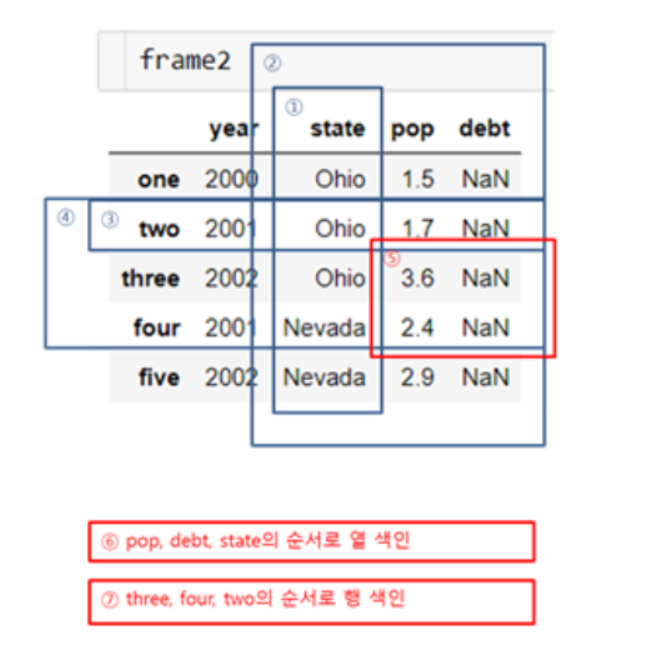

In [ ]:
from IPython.display import Image
Image('./images/image7.png', width=400)

In [ ]:
#1
frame2['state'] # frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [ ]:
#2
frame2[['state', 'pop','debt']]

state  pop debt
one      Ohio  1.5  NaN
two      Ohio  1.7  NaN
three    Ohio  3.6  NaN
four   Nevada  2.4  NaN
five   Nevada  2.9  NaN

In [ ]:
frame2.loc[:, 'state':'debt']

state  pop debt
one      Ohio  1.5  NaN
two      Ohio  1.7  NaN
three    Ohio  3.6  NaN
four   Nevada  2.4  NaN
five   Nevada  2.9  NaN

In [ ]:
#3
frame2.loc['two']

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [ ]:
frame2.iloc[1]

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [ ]:
#4
frame2.loc['two':'four']

year   state  pop debt
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN

In [ ]:
frame2.iloc[1:4]

year   state  pop debt
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN

In [ ]:
frame2['two':'four']

year   state  pop debt
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN

In [ ]:
#5
frame2.loc['three':'four', 'pop':'debt']

pop debt
three  3.6  NaN
four   2.4  NaN

In [ ]:
frame2.iloc[2:4, 2:4]

pop debt
three  3.6  NaN
four   2.4  NaN

In [ ]:
#6
frame2[['pop', 'debt', 'state']]

pop debt   state
one    1.5  NaN    Ohio
two    1.7  NaN    Ohio
three  3.6  NaN    Ohio
four   2.4  NaN  Nevada
five   2.9  NaN  Nevada

In [ ]:
#7
frame2.loc[['three', 'four', 'two']]

year   state  pop debt
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
two    2001    Ohio  1.7  NaN

In [ ]:
frame2.iloc[[2, 3, 1]]

year   state  pop debt
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
two    2001    Ohio  1.7  NaN